# Wrangle WeRateDogs Data

This document contains the code that was used to wrangle the data.


## Gather

Here I begin the process of wrangling by gathering the required data.

In [1]:
# Load necessary modules
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import collections
import functools
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
# Start by loading the twitter-archive-enhanced.csv file into a dataframe
tweet_data_archived = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 1. Import the requests library
import requests
URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# 2. download the data behind the URL
response = requests.get(URL)

# 3. Open the response into a new file called image-predictions.tsv
open("image-predictions.tsv", "wb").write(response.content)

# Load image prediction data into a dataframe
images = pd.read_csv('image-predictions.tsv', delim_whitespace=True)

In [4]:
# additional data from the Twitter API

# Create tweepy api object
auth = tweepy.OAuth2BearerHandler("AAAAAAAAAAAAAAAAAAAAABhFeAEAAAAAAv8y4P927ODwir%2FesfA3xFgc73M%3DCrVAi9t0isz1mq4B4Z1cwnXMsHTcVt4xLdN2HlwYlX5cNDtZi3")
api = tweepy.API(auth, wait_on_rate_limit=True)


In [5]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
# creating a dataframe with relevant fields
df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})

tweet_data_extra = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

The data has now been loaded into the following dataframes:
 - `tweet_data_archived`: contains data about the archived WeRateDogs tweets.
 - `tweet_data_extra`: contains additional data about the WeRateDogs tweets gathered from Twitter.
 - `images`: contains the prediction results of a machine learning algorithm trained on a sample of the images from the tweets in the WeRateDogs archive.

## Assess

visual and programmatic assessment on the data

### Dataframe contents for visual assessment

In [7]:
# Display the twitter archive dataframe
tweet_data_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### `tweet_data_archived` quality issues
- html tags on the source column
- the dog names have issues, ie some names are clearly not names, some have 'none' instead of NAn
- missing data


##### `tweet_data_archived` tidiness issues
- the dog stages [doggo,  pupper, floofer, puppo] are in different columns


In [8]:
# Display the data obtained from the Twitter API
tweet_data_extra

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,7001,33804,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5299,29315,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3477,22041,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7223,36922,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7754,35300,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2322,666049248165822465,37,89,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,115,247,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,36,100,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,39,112,Sun Nov 15 23:05:30 +0000 2015


##### `tweet_data_extra` quality issues

##### `tweet_data_extra` tidiness issues
merge the data to the tweet_data_archived dataframe


In [9]:
# Display the image prediction results dataframe
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


##### `tweet_image_pred` quality issues
- Words combined using underscore in `p1`, `p2`, and `p3`

##### `tweet_image_pred` tidiness issues
merge the data with the other dataframes, they contain same data on the tweet

##### Tidiness issues summary
 - Correct predictions should be combined with `tweet_data_archived`

In [10]:
### Programmatic assessment

# Display the basic info
tweet_data_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### `tweet_data_archived` quality issues 
some datatypes such as:
- timestamp columns have object datatype instead of datetime datatype
- ID columns are of int type

contains retweets


In [11]:
# Display the structure of the supplementary data dataframe
tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


##### `tweet_data_extra` quality issues
the datatype for tweet_id column is not correct
missing values, might be deleted tweets


In [12]:
# Display the structure of the image prediction results dataframe
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### `images` quality issues
tweet_id's datatype is int should change it to string

#### Duplicate data

In [13]:
# Check for duplicate rows and tweet ids in each dataframe
tweet_data_archived[tweet_data_archived.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
tweet_data_extra[tweet_data_extra.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,create_date


In [15]:
images[images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Invalid or inaccurate data


In [16]:
# describe the tweet_archive dataframe
tweet_data_archived[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


##### `tweet_data_archived` quality issues
some values are below the denominator 10, and some are very large values


In [17]:
# checking for large values
tweet_data_archived.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [18]:
# checking for values below the denominator 10
tweet_data_archived.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# describe the df
tweet_data_extra[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2469.403524,7050.988397
std,4182.102561,10957.640787
min,1.000000,0.000000
25%,493.500000,1224.500000
50%,1148.000000,3050.000000
75%,2860.000000,8601.000000
max,70682.000000,144815.000000


In [20]:
# describe the df
images[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


### Summary of quality and tidiness issues

Here I've listed all of the quality and tidiness issues I found in the `tweet_data_archived`, `tweet_data_extra`, and `tweet_image_pred` dataframes.

#### Quality

##### `tweet_data_archived`
 - HTML tags in `source`
 - `name` contains words that are clearly not names
 - Missing data in `name` encoded as the string 'None'
 - Erroneous datatypes (`*_id`, `*timestamp`)
 - `tweet_data_archived` contains retweets
 - Some tweets don't contain useful data
 
##### `tweet_data_extra`
 - Erroneous datatype for `tweet_id` column

##### `images`
 - Erroneous datatype for `tweet_id` column
 - Words combined using underscore in `p1`, `p2`, and `p3`

#### Tidiness

##### `tweet_data_archived`
 - One variable, the type of dog (e.g. `puppo`), spread over four columns

##### `tweet_data_extra`
 - `retweet_count` and `favorite_count` should be part of `tweet_data_archived`
 
##### `images`
 - Correct predictions should be combined with `tweet_data_archived`

## Clean

After having assessed the data for quality and tidiness issues I can now clean the data. I'll start by creating copies of each dataframe

In [21]:
# Create copies of the tweet_data_archived, tweet_data_extra and tweet_image_pred dataframes
tweet_data_archived_clean = tweet_data_archived.copy()
tweet_data_extra_clean = tweet_data_extra.copy()
images_clean = images.copy()

### Tidiness

#### `tweet_data_archived`: one variable, the type of dog (e.g. `puppo`), spread over four columns

##### Define 

Combine the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column called `dog_type` before dropping them. All 'None' strings will be converted to NaNs.

##### Code

In [22]:
# Replace None strings with empty strings
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_data_archived_clean[dog_type_cols] = tweet_data_archived_clean[dog_type_cols].replace('None', '')

# Combine columns and convert empty strings to NaN
dog_type_col_data = [tweet_data_archived_clean[col] for col in dog_type_cols]
tweet_data_archived_clean['dog_type'] = functools.reduce(lambda col_main, col_add: col_main.str.cat(col_add, ', '), dog_type_col_data)
tweet_data_archived_clean['dog_type'] = tweet_data_archived_clean['dog_type'].str.strip(', ')
tweet_data_archived_clean['dog_type'] = tweet_data_archived_clean['dog_type'].apply(lambda x: x.replace(', ', '', x.count(',')-1))
tweet_data_archived_clean['dog_type'] = tweet_data_archived_clean['dog_type'].replace('', np.nan)

# Drop columns
tweet_data_archived_clean = tweet_data_archived_clean.drop(columns=dog_type_cols)

##### Test

In [23]:
# Check columns and datatype
tweet_data_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_type                    380 n

In [24]:
# Check that dog_type column contains correct values
tweet_data_archived_clean.dog_type.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

#### `tweet_data_extra`: `retweet_count` and `favorite_count` should be part of `tweet_data_archived`

##### Define

Merge `tweet_data_archived` and `tweet_data_extra` on `tweet_id` column.

##### Code

In [25]:
tweet_data_archived_clean = pd.merge(tweet_data_archived_clean,
                                     tweet_data_extra_clean,
                                     how='left',
                                     on='tweet_id')

##### Test

In [26]:
tweet_data_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,create_date
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7001.0,33804.0,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5299.0,29315.0,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3477.0,22041.0,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7223.0,36922.0,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7754.0,35300.0,Sat Jul 29 16:00:24 +0000 2017


#### `tweet_image_pred`: correct predictions should be combined with `tweet_data_archived`

##### Define

Extract the correct predictions from each prediction variable in such a way as to prefer the first prediction and combine these predictions with `tweet_data_archived`.

##### Code

In [27]:
# Extract  correct predictions
image_pred_cols = images_clean.columns.tolist()
pred_col_pairs = [[image_pred_cols[i], image_pred_cols[i+2]] for i in
                  range(3, len(image_pred_cols), 3)]

dog_breeds_partial = []
for pred_col_pair in pred_col_pairs:
    p, p_dog = pred_col_pair
    tmp_pred = images_clean.loc[images_clean[p_dog] == True, ['tweet_id', p]]
    dog_breeds_partial.append(tmp_pred.rename(columns={p: 'dog_breed'}))
dog_breeds = pd.concat(dog_breeds_partial, ignore_index=True, sort=True)

# Combine correct predictions with tweet_data_archived
dog_breeds.drop_duplicates('tweet_id', inplace=True)
tweet_data_archived_clean = pd.merge(tweet_data_archived_clean, dog_breeds, on='tweet_id', how='left')

##### Test

In [28]:
tweet_data_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,create_date,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7001.0,33804.0,Tue Aug 01 16:23:56 +0000 2017,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5299.0,29315.0,Tue Aug 01 00:17:27 +0000 2017,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3477.0,22041.0,Mon Jul 31 00:18:03 +0000 2017,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7223.0,36922.0,Sun Jul 30 15:58:51 +0000 2017,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7754.0,35300.0,Sat Jul 29 16:00:24 +0000 2017,basset


### Quality

#### `tweet_data_archived_clean`: erroneous datatypes (`*_id`, `*timestamp`)

##### Define

Convert each of the ID columns into strings and convert the timestamp columns into datetime.

##### Code

In [29]:
# Change id columns to string
id_col_names = [t_id for t_id in tweet_data_archived_clean.columns.tolist() if 'id' in t_id]
for id_col_name in id_col_names:
    if tweet_data_archived_clean[id_col_name].dtype == 'float64':
        tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].fillna(0)
        tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].astype(int)
    tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].astype(str)
    tweet_data_archived_clean[id_col_name] = tweet_data_archived_clean[id_col_name].replace('0', np.nan)

# Change timestamp columns to datetime
ts_col_names = [t_ts for t_ts in tweet_data_archived_clean.columns.tolist() if 'timestamp' in t_ts]
for ts_col_name in ts_col_names:
    tweet_data_archived_clean[ts_col_name] = pd.to_datetime(tweet_data_archived_clean[ts_col_name])

##### Test

In [30]:
tweet_data_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### `tweet_data_archived` contains retweets

##### Define

Remove all rows where `retweeted_status_id`. This will also take care of `retweeted_status_user_id` and `retweeted_status_timestamp` as both of these columns have values in the same rows as `retweeted_status_id`. Afterwards, reset the index.

##### Code

In [31]:
retweeted_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
retweeted_mask = tweet_data_archived_clean.retweeted_status_id.notnull()

tweet_data_archived_clean = tweet_data_archived_clean[~retweeted_mask]
tweet_data_archived_retweet_test = tweet_data_archived_clean.copy() # For testing
tweet_data_archived_clean.drop(columns=retweeted_cols, inplace=True)
tweet_data_archived_clean.reset_index(drop=True, inplace=True)

##### Test

In [32]:
# Make sure we deleted all retweets
tweet_data_archived_retweet_test.retweeted_status_id.notnull().sum()

0

In [33]:
# Make sure we removed all retweet columns
tweet_data_archived_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,create_date,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7001.0,33804.0,Tue Aug 01 16:23:56 +0000 2017,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5299.0,29315.0,Tue Aug 01 00:17:27 +0000 2017,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3477.0,22041.0,Mon Jul 31 00:18:03 +0000 2017,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7223.0,36922.0,Sun Jul 30 15:58:51 +0000 2017,Labrador_retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7754.0,35300.0,Sat Jul 29 16:00:24 +0000 2017,basset


#### `tweet_data_archived`: `name` column contains words that are clearly not names

##### Define

Search for lowercase words in `name` column. In these rows extract the name of the dog by searching for the word 'name' and the string 'That is' in the text column. Replace the word with the names of the dogs. For the other rows without dog names set the word to NaN.

##### Code

In [34]:
# Get names by using a pattern with 'name'
new_names_n = (tweet_data_archived_clean.text
                  .str.extract('name(?:d| is) (?P<real_name>[A-Z].*?)(?:\s|\.)'))

# Get names by using a pattern with 'That is'
new_names_t = (tweet_data_archived_clean.text
                  .str.extract('That is (?P<real_name>.*?)\.'))
                  
# Replace all strings with lowercase words with NaN
names_nan_mask = tweet_data_archived_clean.name.str.contains('^[a-z]')
tweet_data_archived_clean.loc[names_nan_mask, 'name'] = np.nan
                  
# Combine new names columns with existing names column
tweet_data_archived_clean['name'] = functools.reduce(lambda c_main, c_add: c_main.combine_first(c_add),
                                                     [tweet_data_archived_clean['name'],
                                                      new_names_n['real_name'],
                                                      new_names_t['real_name']])

##### Test

In [35]:
tweet_data_archived_clean.loc[names_nan_mask, 'name']

21      NaN
53      NaN
147     NaN
167     NaN
282     NaN
       ... 
2168    NaN
2169    NaN
2171    NaN
2172    NaN
2173    NaN
Name: name, Length: 104, dtype: object

#### `tweet_data_archived`: missing data in `name` encoded as the string 'None'

##### Define

Replace all instances of the string 'None' with NaN.

##### Code

In [36]:
tweet_data_archived_clean.name = tweet_data_archived_clean.name.replace('None', np.nan)

##### Test

In [37]:
tweet_data_archived_clean.name.loc[tweet_data_archived_clean.name == 'None'].sum()

0

#### `tweet_data_archived`: HTML tags in `source` column

##### Define

Extract the name of the source platform from the HTML tags and replace the original values of the `source` column with them.

##### Code

In [38]:
platform_names = (tweet_data_archived_clean.source.str.extract('>(.*?)<')
                  .rename(columns={0: 'platform_name'}))
tweet_data_archived_clean['source'] = platform_names

##### Test

In [39]:
tweet_data_archived_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### `tweet_image_pred`: erroneous datatype for `tweet_id` column

##### Define

Change datatype of `tweet_id` column to string.

##### Code

In [40]:
images['tweet_id'] = images['tweet_id'].astype(str)

##### Test

#### In `tweet_image_pred` words combined using underscore in `p*` columns. Also the case in `tweet_data_archived` with the `dog_breed` column.

##### Define

Replace the underscore separating the words in each of the `p*` columns in `tweet_image_pred` as well as the `dog_breed` column in `tweet_data_archived`.

##### Code

In [41]:
# Remove underscores p* columns of tweet_image_pred
p_cols = [p_col for p_col in images.columns.tolist() if
          'p' in p_col and '_' not in p_col]
for p_col in p_cols:
    images_clean[p_col] = images_clean[p_col].str.replace('_', ' ')

# Remove underscores in dog_breed column of tweet_data_archived
tweet_data_archived_clean['dog_breed'] = tweet_data_archived_clean['dog_breed'].str.replace('_', ' ')

##### Test

In [42]:
# Check tweet_image_pred
images_clean[p_cols].head(10)

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater Swiss Mountain dog
6,box turtle,mud turtle,terrapin
7,chow,Tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft-coated wheaten terrier


In [43]:
# Check tweet_data_archived
tweet_data_archived_clean['dog_breed'].head(10)

0                         NaN
1                   Chihuahua
2                   Chihuahua
3          Labrador retriever
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: dog_breed, dtype: object

## Final cleaned dataset

After the cleaning step I'm left with a single master dataframe: `tweet_data_archived_clean`. The last thing that I'll do is store it in an appropriately named dataframe and export it to the current working directory.

In [44]:
twitter_archive_master = tweet_data_archived_clean.copy()

out_file = 'twitter-archive-master.csv'
twitter_archive_master.to_csv(out_file, index=False)

## Analysis

Now that I've cleaned the data, I can begin deriving insights from the data about the _**WeRateDogs**_ account and the tweets that they've made. Since this analysis does include the creation of visualizations, I'll first load the necessary libraries.

### Most common dog breeds



In [45]:
twitter_archive_master = pd.read_csv('twitter-archive-master.csv')

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1414 non-null   object 
 10  dog_type               344 non-null    object 
 11  retweet_count          2167 non-null   float64
 12  favorite_count         2167 non-null   float64
 13  create_date            2167 non-null   object 
 14  dog_breed              1686 non-null   object 
dtypes: f

Text(0.5, 0, 'Total')

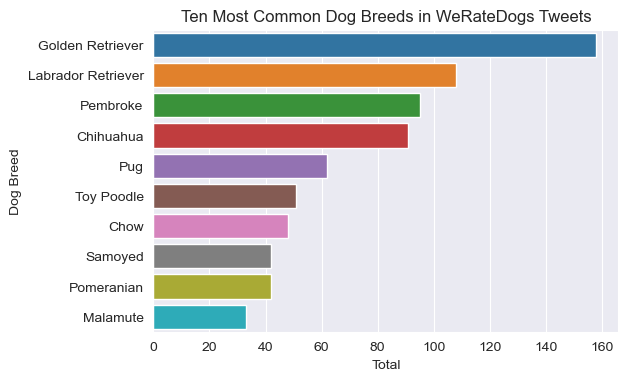

In [46]:
# Plot counts of the 10 most common dog breeds
top_breeds = (twitter_archive_master.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100)
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds)
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets')
ax.set_ylabel('Dog Breed')
ax.set_xlabel('Total')

### Most common dog type

Here I'll look at which of the dog labels or types (e.g., doggo, puppo, etc.) is the most common.
This will give me some idea of the ages of the dogs shown in the tweets.

Text(0.5, 0, 'Dog Type')

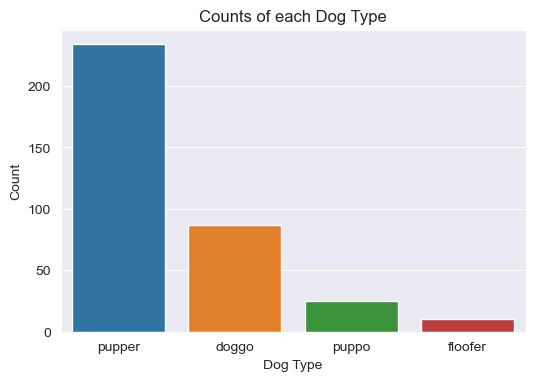

In [47]:
# Extract separate dog types
dog_type_mask = twitter_archive_master['dog_type'].notnull()
dog_type_raw = twitter_archive_master.dog_type.loc[dog_type_mask].str.split(',').tolist()
dog_type = list(map(lambda x: x.strip(), itertools.chain.from_iterable(dog_type_raw)))
dog_type = np.array(dog_type)

# Plot counts of each dog type
plot_category_order = ['pupper', 'doggo', 'puppo', 'floofer']
plt.figure(dpi=100)
ax = sns.countplot(x=dog_type, order=plot_category_order)
ax.set_title('Counts of each Dog Type')
ax.set_ylabel('Count')
ax.set_xlabel('Dog Type')

From the bar chart it would appear that the majority of the dogs displayed in the tweets are puppers

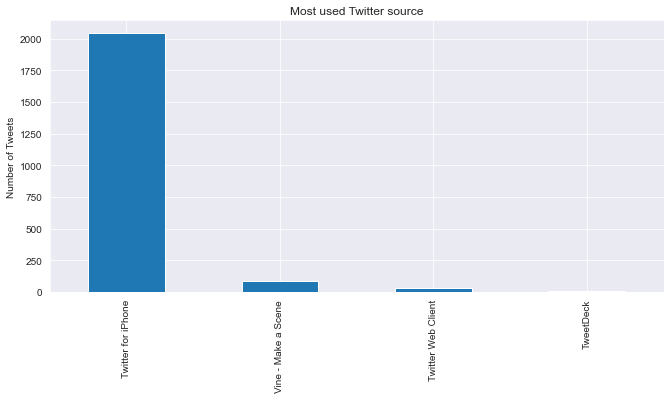

In [48]:
# most used Twitter platforms
twitter_archive_master['source'].value_counts().plot(kind='bar', figsize=(11,5), title='Most used Twitter source').set_ylabel("Number of Tweets",)
plt.savefig('twitter_source')

most people tweet on iphone, cant conclude if this is the case all over the world

### number of tweets made over time

In [49]:
data = twitter_archive_master.tweet_id.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

AttributeError: Can only use .dt accessor with datetimelike values

### Number of replies made by WeRateDogs account


In [ ]:
# Get total number of replies and total number of tweets in dataset
reply_mask = twitter_archive_master.in_reply_to_status_id.notnull()
num_replies = twitter_archive_master.in_reply_to_status_id.loc[reply_mask].unique().size
num_tweets = twitter_archive_master.shape[0]

# Print the totals
print('Total number of replies: {}'.format(num_replies))
print('Total number of tweets in cleaned dataset: {}'.format(num_tweets))

### retweets and favorites over time

In [ ]:
# retweets and favorites over time
plt.subplots(1, sharex=True)
twitter_archive_master.retweet_count.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).mean().plot('line')
twitter_archive_master.favorite_count.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favorite trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

In [ ]:
twitter_archive_master.info()

### breeds that have the highest favorite count

In [ ]:
fav_counts_breed = twitter_archive_master[twitter_archive_master.dog_breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['dog_breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top_favorite_breeds = fav_counts_breed.head(20)
top_favorite_breeds

In [ ]:
plt.barh(top_favorite_breeds.index, top_favorite_breeds)
plt.xlabel('Aggregate Favorite Count', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Dog Breeds by Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

### retweets over time